In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import ast

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [152]:
## Convert csv to h5 and store
# h5 reference: https://realpython.com/fast-flexible-pandas/#selecting-data-with-isin

strava_data = pd.read_csv('raw_strava_data.csv')
# Convert data to usable things
strava_data['elapsed_time'] = pd.to_timedelta(strava_data['elapsed_time'])
            
strava_data['moving_time'] = pd.to_timedelta(strava_data['moving_time'])

strava_data['start_date_local'] = pd.to_datetime(strava_data['start_date_local'])

# The map dictionary is a string coming from the csv
strava_data["map"] = strava_data['map'].apply(ast.literal_eval)

# Create storage object with filename `processed_data`
data_store = pd.HDFStore('strava_data.h5')

# Put DataFrame into the object setting the key as 'preprocessed_df'
data_store['strava_data'] = strava_data
data_store.close()

/usr/local/lib/python3.5/dist-packages/ipython-6.4.0-py3.5.egg/IPython/core/interactiveshell.py:2963: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block4_values] [items->['start_date', 'timezone', 'athlete', 'map', 'end_latlng', 'external_id', 'type', 'name', 'device_watts', 'start_latlng']]

  exec(code_obj, self.user_global_ns, self.user_ns)


In [149]:
# Access data store
strava_data_h5 = pd.HDFStore('strava_data.h5')

# Retrieve data using key
strava_data = strava_data_h5['strava_data']
strava_data_h5.close()

In [22]:
morning_mask = strava_data['start_date_local'].dt.hour < 10
evening_mask = strava_data['start_date_local'].dt.hour > 13 
weekday_mask = strava_data['start_date_local'].dt.weekday < 5


In [103]:
morning_mask = strava_data['start_date_local'].dt.hour.isin(range(7, 11))
evening_mask = strava_data['start_date_local'].dt.hour.isin(range(14, 20))
weekday_mask = strava_data['start_date_local'].dt.weekday.isin(range(0, 5))
normal_time_mask = ((strava_data['moving_time'].dt.seconds / 60) > 10) & ((strava_data['moving_time'].dt.seconds / 60) < 30)

In [104]:
morning_commutes = strava_data[morning_mask & weekday_mask & normal_time_mask]
evening_commutes = strava_data[evening_mask & weekday_mask & normal_time_mask]

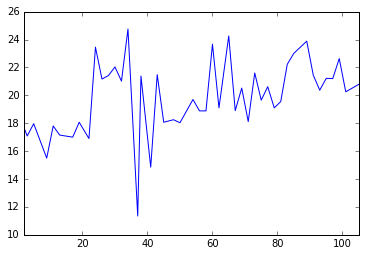

In [106]:
(evening_commutes['moving_time'] / pd.Timedelta(minutes=1)).plot()
plt.show()

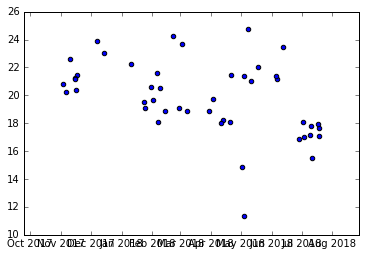

In [107]:
to_plot = evening_commutes.copy()
to_plot['moving_time'] = to_plot.loc[:,'moving_time'] / pd.Timedelta(minutes=1)
plt.scatter(to_plot['start_date_local'].dt.to_pydatetime(), to_plot['moving_time'])
plt.show()

In [157]:
pl = strava_data['map'][1]["summary_polyline"]

In [158]:
import polyline


[(33.77472, -84.38523),
 (33.77404, -84.38491),
 (33.77608, -84.38451),
 (33.77591, -84.37994),
 (33.78181, -84.37931),
 (33.7819, -84.36856),
 (33.77859, -84.36603),
 (33.7718, -84.36414)]

In [171]:
unzip(test)

NameError: name 'unzip' is not defined

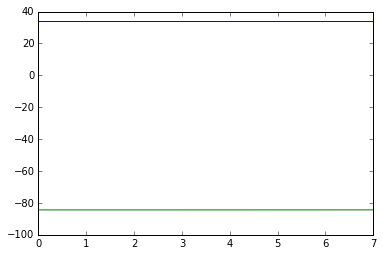

In [159]:
test = polyline.decode(pl)
plt.plot(test)

In [141]:
# https://markhneedham.com/blog/2017/04/29/leaflet-strava-polylines-osm/
# https://dzone.com/articles/strava-calculating-the-similarity-of-two-runs
# http://bl.ocks.org/matt-leach/5336dc8249cf4401fc0f6b31743202e5
# http://andykee.com/visualizing-strava-tracks-with-python.html
# https://gis.stackexchange.com/questions/42224/creating-polyline-based-heatmap-from-gps-tracks

0      {'summary_polyline': None, 'id': 'a1723496246'...
1      {'summary_polyline': '_scmEtn`bOfC_AwKoA`@q[{c...
2      {'summary_polyline': 'elbmEf_|aOcOhIum@xKqS~NH...
3      {'summary_polyline': 'gpemEhmbbOj@z@oCkA~@u@e@...
4      {'summary_polyline': 'clbmEd_|aOcPnIen@dLqRbNJ...
5      {'summary_polyline': 'epemEvlbbOoJS{@wk@j@_SwA...
6      {'summary_polyline': '_acmExj|aO{g@|I{T`ODnYiC...
7      {'summary_polyline': '_~_mElzbbOkD_NaKeP}Lq@Vo...
8      {'summary_polyline': 'albmEd_|aOaBRxLwLnO_CUcL...
9      {'summary_polyline': 'wvemEnmbbOmD]Uod@sBwGlAc...
10     {'summary_polyline': 'elbmEd_|aOyOlIol@hKmS|MO...
11     {'summary_polyline': '{qemE`kbbOt@zA_ILuA_KDc\...
12     {'summary_polyline': '}kbmEh_|aOoPlIwk@bKuL`Hk...
13     {'summary_polyline': 'ewemEnmbbOiCOUoc@{A}Fv@@...
14     {'summary_polyline': 'mlbmEd_|aOgP|Iel@bK}SlNJ...
15     {'summary_polyline': '}ncmEvl`bOaLmAj@s[wc@_CS...
16     {'summary_polyline': 'clbmEd_|aOoSlKai@rIkTdOX...
17     {'summary_polyline': 'ou